In [1]:
from tqdm import tqdm

from ydnpd import load_dataset, HyperParamSearchTask, PrivacyUtilityTradeoffTask, suppress_output

/opt/homebrew/Caskroom/miniconda/base/envs/sdnist/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
hparam_mwem_task = HyperParamSearchTask(epsilons=[1, 4, 10], synth_name="mwem",
                                        hparam_dims={"preprocessor_eps": [0.1],
                                                     "q_count": [100, 1000],
                                                     "marginal_width": [2, 3],
                                                     "iterations": [10, 20],
                                                     "add_ranges": [False, True]})

# hparams_mwem_results = {}

# for dataset_name in tqdm(["national", "massachusetts", "baseline_domain"]):

#     dataset, scheme = load_dataset(dataset_name)
#     with suppress_output():
#         hparams_mwem_results[dataset_name] = hparam_mwem_task.execute(dataset, scheme)

import pickle
hparams_mwem_results = pickle.load(open("hparams_mwem_results.pkl", "rb"))

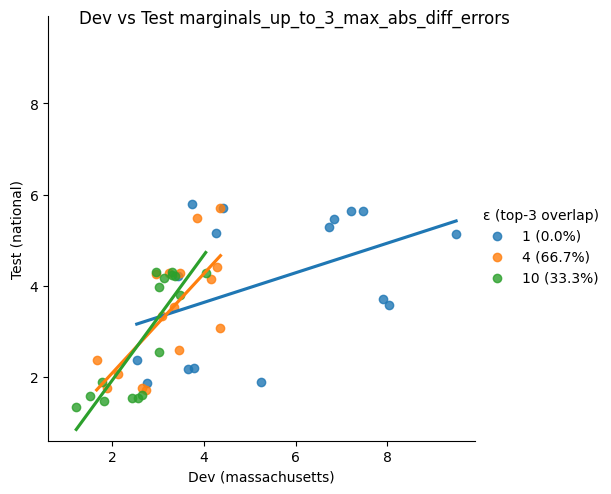

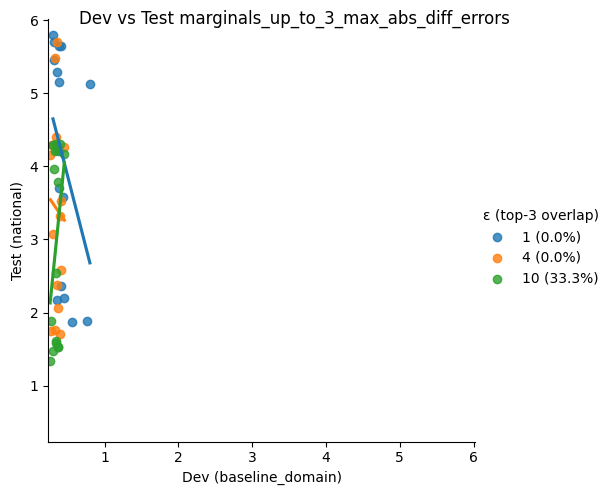

In [3]:
EXPERIMENTS = [("massachusetts", "national"),
               ("baseline_domain", "national")]

for dev_name, test_name in EXPERIMENTS:
    hparam_mwem_task.plot(hparams_mwem_results,
                          dev_name=dev_name,
                          test_name=test_name)

In [4]:
tradeoff_mwem_task = PrivacyUtilityTradeoffTask(hparam_mwem_task)

tradeoff_mwem_task.evaluate(hparams_mwem_results,
                            dev_name="baseline_domain",
                            test_name="national")

,dev_dev,test_dev,test_test
epsilon,,,
1,70.0,1334.0,429.0
4,62.0,956.0,393.0
10,61.0,309.0,309.0


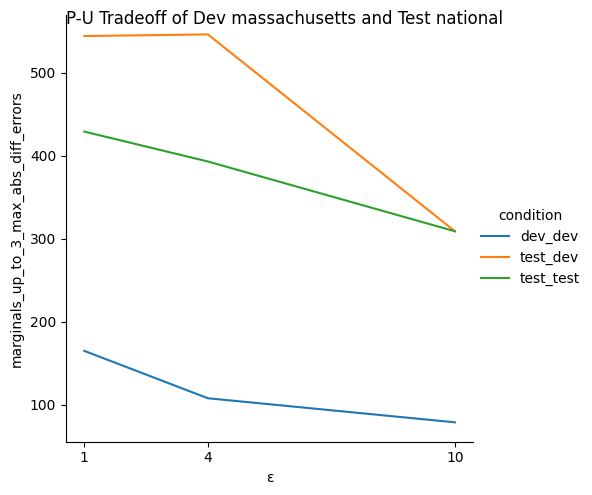

In [5]:
tradeoff_mwem_task.plot(hparams_mwem_results,
                        dev_name="massachusetts",
                        test_name="national")

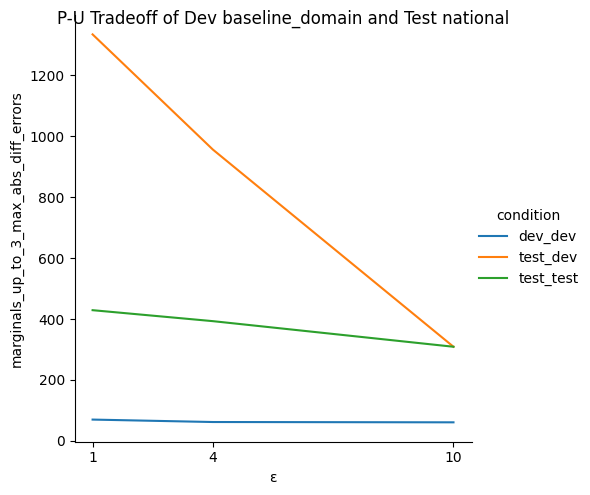

In [6]:
tradeoff_mwem_task.plot(hparams_mwem_results,
                        dev_name="baseline_domain",
                        test_name="national")